## Localização antena A B C

### Instalação e carregamento das bibliotecas de GA em python

In [1]:
!pip install deap

     |████████████████████████████████| 163kB 2.8MB/s 


In [2]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [3]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
def DespesaAntenas(individual):
  alcanceA = individual[0]
  alcanceB = individual[1]
  alcanceC = individual[2]
  custo_total = (alcanceA+alcanceB+alcanceC)*970
  return custo_total,

In [4]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(individual):
  alcanceA = individual[0]
  alcanceB = individual[1]
  alcanceC = individual[2]
  xA = 22
  yA = 11
  xB = 12
  yB = 33
  xC = 41
  yC = 37
  localizacaoAntenasFisica = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  for localizacaoAntena in localizacaoAntenasFisica:
    if((math.sqrt(((xA-localizacaoAntena[0])**2) + ((yA-localizacaoAntena[1])**2)) <= alcanceA)):
      cidadesAtendidasAntenaA.append(1)
    else:
      cidadesAtendidasAntenaA.append(0)
    if((math.sqrt(((xB-localizacaoAntena[0])**2) + ((yB-localizacaoAntena[1])**2)) <= alcanceB)):
      cidadesAtendidasAntenaB.append(1)
    else:
      cidadesAtendidasAntenaB.append(0)
    if((math.sqrt(((xC-localizacaoAntena[0])**2) + ((yC-localizacaoAntena[1])**2)) <= alcanceC)):
      cidadesAtendidasAntenaC.append(1)
    else:
      cidadesAtendidasAntenaC.append(0)
  for i in range(len(cidadesAtendidasAntenaA)):
    if((cidadesAtendidasAntenaA[i] == 1) or (cidadesAtendidasAntenaB[i] == 1) or (cidadesAtendidasAntenaC[i] == 1)):
      cidadesAtendidas.append(True)
    else:
      cidadesAtendidas.append(False)
  if ((sum(cidadesAtendidasAntenaA)>=3) and (sum(cidadesAtendidasAntenaB)>=3) and (sum(cidadesAtendidasAntenaC)>=3) and (sum(cidadesAtendidas)==len(cidadesAtendidas))):
    return True
  return False

In [5]:
# Função para cálculo da penalização da função objetivo para os casos em que o individuo não satisfaça as restrições
def distance(individual):
  constraintA = 0
  constraintB = 0
  constraintC = 0
  alcanceA = individual[0]
  alcanceB = individual[1]
  alcanceC = individual[2]
  xA = 22
  yA = 11
  xB = 12
  yB = 33
  xC = 41
  yC = 37
  localizacaoAntenasFisica = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  for localizacaoAntena in localizacaoAntenasFisica:
    dist = (((xA-localizacaoAntena[0])**2) + ((yA-localizacaoAntena[1])**2) + alcanceA)
    if((math.sqrt(((xA-localizacaoAntena[0])**2) + ((yA-localizacaoAntena[1])**2)) > alcanceA)):
      constraintA = constraintA + dist
    dist = (((xB-localizacaoAntena[0])**2) + ((yB-localizacaoAntena[1])**2) + alcanceB)
    if((math.sqrt(((xB-localizacaoAntena[0])**2) + ((yB-localizacaoAntena[1])**2)) > alcanceB)):
      constraintB = constraintB + dist
    dist = (((xC-localizacaoAntena[0])**2) + ((yC-localizacaoAntena[1])**2) + alcanceC)
    if((math.sqrt(((xC-localizacaoAntena[0])**2) + ((yC-localizacaoAntena[1])**2)) > alcanceC)):
      constraintC = constraintC + dist
  return (constraintA**2 + constraintB**2 + constraintC**2)**2

In [6]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, attr_bool_function):
  i = 0
  cromossomo = list()
  for _ in range(10): 
    v7 = attr_bool_function()
    v8 = attr_bool_function()
    v9 = attr_bool_function()
    if FuncaoDeRestricao([v7, v8, v9]):
      break
    i = i + 1
  cromossomo.append(v7)
  cromossomo.append(v8)
  cromossomo.append(v9)
  return icls(cromossomo)

In [ ]:
# Função própria de cruzamento 
## ~~~~ No caso, não está sendo chamada! ~~~~
def CrossoverFunction(ind1, ind2, icls, attr_bool_function):
  new_ind1, new_ind2 = tools.cxTwoPoint(ind1, ind2)
  if(not(FuncaoDeRestricao(new_ind1))):
    new_ind1, = tools.cxOnePoint(ind1, ind2)
    if(not(FuncaoDeRestricao(new_ind1))):
      new_ind1, = tools.cxUniform(ind1, ind2, indpb=0.2)
      if(not(FuncaoDeRestricao(new_ind1))):
        tries = 0
        while(not(FuncaoDeRestricao(new_ind1))):
          if tries >= 20:
            new_ind1 = ind1
            break
          new_ind1 = GeradorDeIndividuos(icls, attr_bool_function)
          tries = tries + 1
  if(not(FuncaoDeRestricao(new_ind2))):
    ,new_ind1 = tools.cxOnePoint(ind1, ind2)
    if(not(FuncaoDeRestricao(new_ind2))):
      ,new_ind2 = tools.cxUniform(ind1, ind2, indpb=0.2)
      if(not(FuncaoDeRestricao(new_ind2))):
        tries = 0
        while(not(FuncaoDeRestricao(new_ind2))):
          if tries >= 20:
            new_ind2 = ind2
            break
          new_ind2 = GeradorDeIndividuos(icls, attr_bool_function)
          tries = tries + 1
  return new_ind1,new_ind2

In [ ]:
# Função própria de mutação 
## ~~~~ No caso, não está sendo chamada! ~~~~~
def MutationFunction(ind, indpb):
  new_ind = tools.mutFlipBit(ind, indpb)[0]
  alcanceA = new_ind[0]
  alcanceB = new_ind[1]
  alcanceC = new_ind[2]
  tries = 0
  while not(FuncaoDeRestricao([alcanceA, alcanceB, alcanceC])):
    new_ind = tools.mutFlipBit(ind, indpb)[0]
    alcanceA = new_ind[0]
    alcanceB = new_ind[1]
    alcanceC = new_ind[2]
    if tries >= 20:
      new_ind = ind
    tries = tries + 1
  return new_ind,

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [7]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [8]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("attr_bool", random.randint, 0, 50)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
#toolbox.register("individualCreator", GeradorDeIndividuos, toolbox.attr_bool)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.attr_bool)
#toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 2)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", DespesaAntenas)
# Registro da função de penalidade caso o individuo não obedeça as restrições
toolbox.decorate("evaluate", tools.DeltaPenalty(FuncaoDeRestricao, 0, distance)) 
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mate", CrossoverFunction, icls=creator.Individual, attr_bool_function=toolbox.attr_bool)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# toolbox.register("mutate", MutationFunction, indpb=0.1)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selTournament, tournsize=4)

## Chamada efetiva do GA para resolução

In [9]:
pop = toolbox.population(n=50)                           # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [10]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.7, ngen=15, stats=stats, halloffame=hof, verbose=True) #aumentei mut = 0.7

gen	nevals	avg    	std    	min  	max   
0  	50    	93857.2	18170.4	59170	138710
1  	48    	2.1671e+15	4.33748e+15	59170	1.56236e+16
2  	45    	1.80651e+15	4.54634e+15	52380	1.56236e+16
3  	40    	1.66691e+15	4.26006e+15	48500	1.44837e+16
4  	38    	1.89586e+15	4.48815e+15	48500	1.44787e+16
5  	42    	2.07843e+15	4.79558e+15	48500	1.44972e+16
6  	47    	6.85933e+14	2.71628e+15	47530	1.16725e+16
7  	42    	1.15631e+15	3.47406e+15	47530	1.25672e+16
8  	41    	7.26019e+14	2.90108e+15	47530	1.43974e+16
9  	43    	1.93436e+15	4.44888e+15	47530	1.43974e+16
10 	36    	2.06899e+15	4.75372e+15	47530	1.43974e+16
11 	47    	1.62668e+15	4.42885e+15	47530	1.55857e+16
12 	48    	1.43974e+15	4.31923e+15	47530	1.43974e+16
13 	44    	7.39065e+14	2.92658e+15	47530	1.25672e+16
14 	46    	1.80268e+15	4.48389e+15	47530	1.43974e+16
15 	44    	2.09943e+15	4.84155e+15	47530	1.55857e+16


## Resultados

In [11]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Verificação da função de restrição
print(FuncaoDeRestricao(hof[0]))


# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
DespesaAntenas(hof[0])

Melhor Indivíduo:
[22, 14, 13]
True
Melhor Resultado da Função Objetivo:


(47530,)

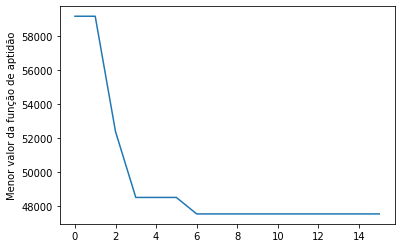

In [12]:
import matplotlib.pyplot as plt
gen, minVal = log.select("gen", "min")
plt.plot(gen, minVal)
plt.ylabel('Menor valor da função de aptidão')
plt.show()

## Utilizando a forma alternativa de resolução do mesmo problema

In [13]:
# definição da população inicial
population = toolbox.population(n=30)
# quantidade de gerações
NGEN=25
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(min(fits))], min(fits)])
  bestInd.append(min(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", min(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(min(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", min(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )


Geracao:  0
[[26, 16, 18], [24, 25, 16], [45, 14, 13], [26, 33, 13], [19, 35, 18], [30, 13, 34], [24, 26, 28], [44, 21, 14], [15, 32, 32], [46, 17, 18], [32, 26, 30], [35, 34, 20], [41, 31, 21], [37, 12, 46], [18, 50, 29], [26, 41, 31], [13, 49, 38], [39, 29, 37], [49, 32, 24], [39, 36, 32], [32, 28, 47], [21, 46, 41], [29, 38, 42], [44, 28, 38], [31, 35, 46], [49, 16, 50], [44, 49, 22], [50, 35, 34], [43, 39, 37], [36, 48, 47]]
[(58200,), (63050,), (69840,), (69840,), (69840,), (74690,), (75660,), (76630,), (76630,), (78570,), (85360,), (86330,), (90210,), (92150,), (94090,), (95060,), (97000,), (101850,), (101850,), (103790,), (103790,), (104760,), (105730,), (106700,), (108640,), (111550,), (111550,), (115430,), (115430,), (127070,)]
 Melhor Avaliação dessa geração:  (58200,) 
 Melhor Avaliação Geral (58200,) 
 Da geração:  0 
 Cromossomo:  [26, 16, 18] 

Geracao:  1
[[26, 14, 13], [26, 16, 16], [24, 25, 18], [13, 49, 22], [45, 33, 13], [43, 26, 28], [26, 41, 31], [24, 39, 37], [49,

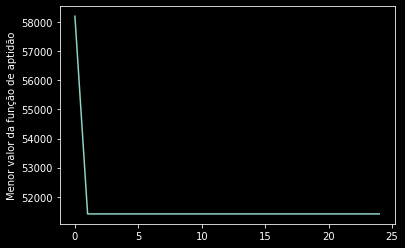

In [14]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Menor valor da função de aptidão')
plt.show()